# L4 PCA-Hotels

#### First look at the hotels data


In [60]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [61]:
# load in clean and tidy data and create workfile
df = pd.read_csv("hotels-vienna.csv")

In [62]:
df

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,offer_cat,year,month,weekend,holiday,distance,distance_alter,accommodation_type,nnights,rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,15-50% offer,2017,11,0,0,2.7,4.4,Apartment,1,4.4
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,1-15% offer,2017,11,0,0,1.7,3.8,Hotel,1,3.9
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.4,2.5,Hotel,1,3.7
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,15-50% offer,2017,11,0,0,1.7,2.5,Hotel,1,4.0
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,15-50% offer,2017,11,0,0,1.2,2.8,Hotel,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Austria,Vienna,2.0,City centre,Donauturm,Wieden,109,Vienna,3.0,3.0,...,50%-75% offer,2017,11,0,0,1.5,3.8,Apartment,1,5.0
424,Austria,Vienna,145.0,City centre,Donauturm,Wieden,185,Vienna,5.0,4.0,...,15-50% offer,2017,11,0,0,0.8,3.6,Hotel,1,4.3
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,0% no offer,2017,11,0,0,1.0,3.7,Hotel,1,4.4
426,Austria,Vienna,169.0,City centre,Donauturm,Wieden,58,Vienna,3.0,3.0,...,15-50% offer,2017,11,0,0,1.4,4.1,Hotel,1,3.2


In [63]:
df.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,393.000000,428.000000,428.000000,325.000000,325.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,393.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,191.217435,91.580545,0.772278,0.482638,586.874582,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.577444
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,27.000000,83.000000,3.000000,3.500000,129.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,84.000000,109.500000,3.500000,4.000000,335.000000,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,203.000000,146.000000,4.000000,4.500000,811.000000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.400000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


In [64]:
df.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             428 non-null    object 
 1   city_actual         428 non-null    object 
 2   rating_count        393 non-null    float64
 3   center1label        428 non-null    object 
 4   center2label        428 non-null    object 
 5   neighbourhood       428 non-null    object 
 6   price               428 non-null    int64  
 7   city                428 non-null    object 
 8   stars               428 non-null    float64
 9   ratingta            325 non-null    float64
 10  ratingta_count      325 non-null    float64
 11  scarce_room         428 non-null    int64  
 12  hotel_id            428 non-null    int64  
 13  offer               428 non-null    int64  
 14  offer_cat           428 non-null    object 
 15  year                428 non-null    int64  
 16  month   

# Finding numerical variables and feature engineering for numerical variables

In [68]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['rating_count', 'price', 'stars', 'ratingta', 'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter', 'nnights', 'rating']


In [69]:
# view the numerical variables
df[numerical].head()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
0,36.0,81,4.0,4.5,216.0,1,21894,1,2017,11,0,0,2.7,4.4,1,4.4
1,189.0,81,4.0,3.5,708.0,0,21897,1,2017,11,0,0,1.7,3.8,1,3.9
2,53.0,85,4.0,3.5,629.0,0,21901,1,2017,11,0,0,1.4,2.5,1,3.7
3,55.0,83,3.0,4.0,52.0,0,21902,1,2017,11,0,0,1.7,2.5,1,4.0
4,33.0,82,4.0,3.5,219.0,1,21903,1,2017,11,0,0,1.2,2.8,1,3.9


In [70]:
df_num = df[numerical]
df_num

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
0,36.0,81,4.0,4.5,216.0,1,21894,1,2017,11,0,0,2.7,4.4,1,4.4
1,189.0,81,4.0,3.5,708.0,0,21897,1,2017,11,0,0,1.7,3.8,1,3.9
2,53.0,85,4.0,3.5,629.0,0,21901,1,2017,11,0,0,1.4,2.5,1,3.7
3,55.0,83,3.0,4.0,52.0,0,21902,1,2017,11,0,0,1.7,2.5,1,4.0
4,33.0,82,4.0,3.5,219.0,1,21903,1,2017,11,0,0,1.2,2.8,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2.0,109,3.0,3.0,14.0,1,22404,1,2017,11,0,0,1.5,3.8,1,5.0
424,145.0,185,5.0,4.0,740.0,0,22406,1,2017,11,0,0,0.8,3.6,1,4.3
425,112.0,100,4.0,4.5,1006.0,1,22407,0,2017,11,0,0,1.0,3.7,1,4.4
426,169.0,58,3.0,3.0,135.0,0,22408,1,2017,11,0,0,1.4,4.1,1,3.2


In [71]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    393 non-null    float64
 1   price           428 non-null    int64  
 2   stars           428 non-null    float64
 3   ratingta        325 non-null    float64
 4   ratingta_count  325 non-null    float64
 5   scarce_room     428 non-null    int64  
 6   hotel_id        428 non-null    int64  
 7   offer           428 non-null    int64  
 8   year            428 non-null    int64  
 9   month           428 non-null    int64  
 10  weekend         428 non-null    int64  
 11  holiday         428 non-null    int64  
 12  distance        428 non-null    float64
 13  distance_alter  428 non-null    float64
 14  nnights         428 non-null    int64  
 15  rating          393 non-null    float64
dtypes: float64(7), int64(9)
memory usage: 53.6 KB


In [72]:
# See missing values using isnull
df_num.isnull().sum()

rating_count       35
price               0
stars               0
ratingta          103
ratingta_count    103
scarce_room         0
hotel_id            0
offer               0
year                0
month               0
weekend             0
holiday             0
distance            0
distance_alter      0
nnights             0
rating             35
dtype: int64

In [73]:
# Impute missing values using mean
df_num_imputed = df_num.fillna(df_num.mean())
df_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    428 non-null    float64
 1   price           428 non-null    int64  
 2   stars           428 non-null    float64
 3   ratingta        428 non-null    float64
 4   ratingta_count  428 non-null    float64
 5   scarce_room     428 non-null    int64  
 6   hotel_id        428 non-null    int64  
 7   offer           428 non-null    int64  
 8   year            428 non-null    int64  
 9   month           428 non-null    int64  
 10  weekend         428 non-null    int64  
 11  holiday         428 non-null    int64  
 12  distance        428 non-null    float64
 13  distance_alter  428 non-null    float64
 14  nnights         428 non-null    int64  
 15  rating          428 non-null    float64
dtypes: float64(7), int64(9)
memory usage: 53.6 KB


In [74]:
df_num_imputed.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,428.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,183.213126,91.580545,0.772278,0.420417,511.215329,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.553273
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,32.250000,83.000000,3.000000,3.990769,186.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,101.000000,109.500000,3.500000,4.000000,556.516923,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,184.000000,146.000000,4.000000,4.000000,617.250000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.300000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


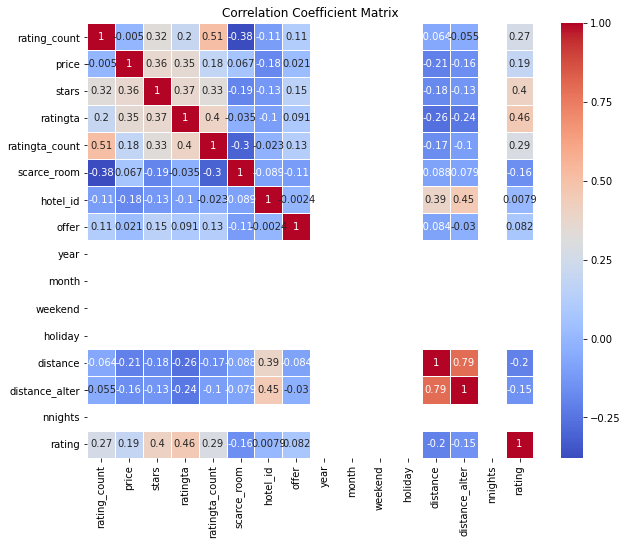

In [75]:
# Correlation in numerial data for imputed data
# Assuming df_num is your DataFrame
correlation_matrix = df_num_imputed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

The absence of calculated correlation values for certain variables, such as "year," "month," and "weekend," in the correlation matrix is because these variables are categorical or binary variables.

Correlation coefficients are typically used to measure the strength and direction of linear relationships between continuous variables. Since categorical variables do not have a natural ordering or numeric representation, it is not meaningful to calculate correlation coefficients between them.

If you have categorical or binary variables in your dataset, it is common to calculate other types of association measures specific to categorical variables. Some commonly used measures for categorical variables include chi-square test, Cramer's V, and point biserial correlation.

In [79]:
# Checking subcategories for numerical variables to see if some integer valued variables are actually categorical
for column in df_num:
    num_categories = df_num_imputed[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in rating_count: 225
Number of categories in price: 164
Number of categories in stars: 8
Number of categories in ratingta: 8
Number of categories in ratingta_count: 274
Number of categories in scarce_room: 2
Number of categories in hotel_id: 428
Number of categories in offer: 2
Number of categories in year: 1
Number of categories in month: 1
Number of categories in weekend: 1
Number of categories in holiday: 1
Number of categories in distance: 61
Number of categories in distance_alter: 76
Number of categories in nnights: 1
Number of categories in rating: 21


In [80]:
# Because there is only one distinct category in some numeric variables we will remove them from our data

#Drop one distinct numeric variables
columns_to_remove = ['year', 'month', 'weekend', 'holiday', 'nnights']
df_num_dropped = df_num_imputed.drop(columns=columns_to_remove)
df_num_dropped

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,distance,distance_alter,rating
0,36.0,81,4.0,4.500000,216.000000,1,21894,1,2.7,4.4,4.4
1,189.0,81,4.0,3.500000,708.000000,0,21897,1,1.7,3.8,3.9
2,53.0,85,4.0,3.500000,629.000000,0,21901,1,1.4,2.5,3.7
3,55.0,83,3.0,4.000000,52.000000,0,21902,1,1.7,2.5,4.0
4,33.0,82,4.0,3.500000,219.000000,1,21903,1,1.2,2.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...
423,2.0,109,3.0,3.000000,14.000000,1,22404,1,1.5,3.8,5.0
424,145.0,185,5.0,4.000000,740.000000,0,22406,1,0.8,3.6,4.3
425,112.0,100,4.0,4.500000,1006.000000,1,22407,0,1.0,3.7,4.4
426,169.0,58,3.0,3.000000,135.000000,0,22408,1,1.4,4.1,3.2


In [81]:
df_num_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    428 non-null    float64
 1   price           428 non-null    int64  
 2   stars           428 non-null    float64
 3   ratingta        428 non-null    float64
 4   ratingta_count  428 non-null    float64
 5   scarce_room     428 non-null    int64  
 6   hotel_id        428 non-null    int64  
 7   offer           428 non-null    int64  
 8   distance        428 non-null    float64
 9   distance_alter  428 non-null    float64
 10  rating          428 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.9 KB


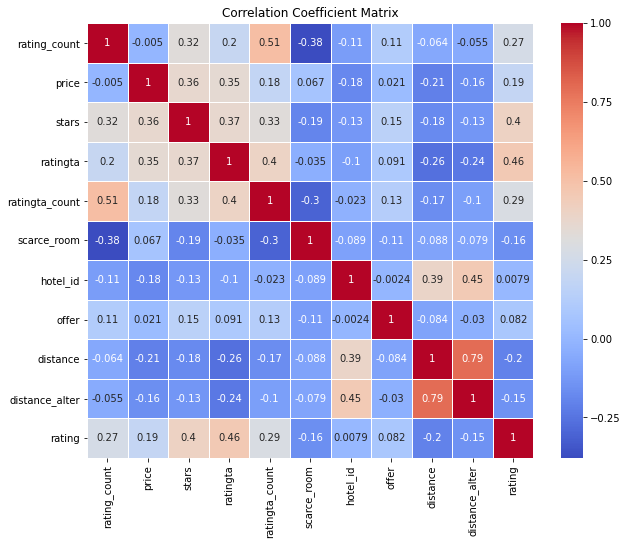

In [82]:
# Correlation in numerial data for df_num_dropped data
# Assuming df_num is your DataFrame
correlation_matrix = df_num_dropped.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [83]:
df_num_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    428 non-null    float64
 1   price           428 non-null    int64  
 2   stars           428 non-null    float64
 3   ratingta        428 non-null    float64
 4   ratingta_count  428 non-null    float64
 5   scarce_room     428 non-null    int64  
 6   hotel_id        428 non-null    int64  
 7   offer           428 non-null    int64  
 8   distance        428 non-null    float64
 9   distance_alter  428 non-null    float64
 10  rating          428 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.9 KB


In [84]:
df_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    428 non-null    float64
 1   price           428 non-null    int64  
 2   stars           428 non-null    float64
 3   ratingta        428 non-null    float64
 4   ratingta_count  428 non-null    float64
 5   scarce_room     428 non-null    int64  
 6   hotel_id        428 non-null    int64  
 7   offer           428 non-null    int64  
 8   year            428 non-null    int64  
 9   month           428 non-null    int64  
 10  weekend         428 non-null    int64  
 11  holiday         428 non-null    int64  
 12  distance        428 non-null    float64
 13  distance_alter  428 non-null    float64
 14  nnights         428 non-null    int64  
 15  rating          428 non-null    float64
dtypes: float64(7), int64(9)
memory usage: 53.6 KB


In [85]:
df_num_imputed.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,428.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,183.213126,91.580545,0.772278,0.420417,511.215329,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.553273
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,32.250000,83.000000,3.000000,3.990769,186.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,101.000000,109.500000,3.500000,4.000000,556.516923,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,184.000000,146.000000,4.000000,4.000000,617.250000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.300000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


In [86]:
df_num_dropped.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,distance,distance_alter,rating
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,1.658879,3.718458,3.970992
std,183.213126,91.580545,0.772278,0.420417,511.215329,0.490850,146.858477,0.467058,1.595673,1.631341,0.553273
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,0.000000,0.600000,1.000000
25%,32.250000,83.000000,3.000000,3.990769,186.000000,0.000000,22027.750000,0.000000,0.700000,2.700000,3.700000
50%,101.000000,109.500000,3.500000,4.000000,556.516923,1.000000,22155.500000,1.000000,1.300000,3.400000,4.000000
75%,184.000000,146.000000,4.000000,4.000000,617.250000,1.000000,22279.250000,1.000000,2.000000,4.400000,4.300000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,13.000000,13.000000,5.000000


In [87]:
# Checking subcategories for numerical variables to see if some integer valued variables are actually categorical
for column in df_num:
    num_categories = df_num_imputed[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in rating_count: 225
Number of categories in price: 164
Number of categories in stars: 8
Number of categories in ratingta: 8
Number of categories in ratingta_count: 274
Number of categories in scarce_room: 2
Number of categories in hotel_id: 428
Number of categories in offer: 2
Number of categories in year: 1
Number of categories in month: 1
Number of categories in weekend: 1
Number of categories in holiday: 1
Number of categories in distance: 61
Number of categories in distance_alter: 76
Number of categories in nnights: 1
Number of categories in rating: 21


# PCA with imputed data

In [88]:
#Scaling for imputed data

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_imputed)

# Create a new DataFrame with the scaled data
df_scaled_imputed = pd.DataFrame(scaled_data, columns=df_num_imputed.columns)

# Print the scaled data
print(df_scaled_imputed)


     rating_count     price  stars  ratingta  ratingta_count  scarce_room  \
0        0.022727  0.054822  0.750  0.833333        0.067529          1.0   
1        0.122078  0.054822  0.750  0.500000        0.222783          0.0   
2        0.033766  0.058883  0.750  0.500000        0.197854          0.0   
3        0.035065  0.056853  0.500  0.666667        0.015778          0.0   
4        0.020779  0.055838  0.750  0.500000        0.068476          1.0   
..            ...       ...    ...       ...             ...          ...   
423      0.000649  0.083249  0.500  0.333333        0.003787          1.0   
424      0.093506  0.160406  1.000  0.666667        0.232881          0.0   
425      0.072078  0.074112  0.750  0.833333        0.316819          1.0   
426      0.109091  0.031472  0.500  0.333333        0.041969          0.0   
427      0.051299  0.084264  0.625  0.663590        0.174982          1.0   

     hotel_id  offer  year  month  weekend  holiday  distance  distance_alt

In [89]:
# Scaling for dropped data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_dropped)

# Create a new DataFrame with the scaled data
df_scaled_dropped = pd.DataFrame(scaled_data, columns=df_num_dropped.columns)

# Print the scaled data
print(df_scaled_dropped)


     rating_count     price  stars  ratingta  ratingta_count  scarce_room  \
0        0.022727  0.054822  0.750  0.833333        0.067529          1.0   
1        0.122078  0.054822  0.750  0.500000        0.222783          0.0   
2        0.033766  0.058883  0.750  0.500000        0.197854          0.0   
3        0.035065  0.056853  0.500  0.666667        0.015778          0.0   
4        0.020779  0.055838  0.750  0.500000        0.068476          1.0   
..            ...       ...    ...       ...             ...          ...   
423      0.000649  0.083249  0.500  0.333333        0.003787          1.0   
424      0.093506  0.160406  1.000  0.666667        0.232881          0.0   
425      0.072078  0.074112  0.750  0.833333        0.316819          1.0   
426      0.109091  0.031472  0.500  0.333333        0.041969          0.0   
427      0.051299  0.084264  0.625  0.663590        0.174982          1.0   

     hotel_id  offer  distance  distance_alter  rating  
0    0.000000    1

In [90]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components:
[[ 9.40296195e-02 -4.10231580e-03  1.06875517e-01  3.10525614e-02
   1.14136704e-01 -8.32841142e-01  4.99440474e-02  5.15872406e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.06800341e-03  1.30377672e-02  0.00000000e+00  5.72525809e-02]
 [ 3.06210433e-02 -1.53658607e-02 -1.56602875e-02 -2.37427061e-02
   2.22045252e-02 -5.17632813e-01  6.62837885e-02 -8.49820452e-01
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   4.38270224e-02  3.24899935e-02 -0.00000000e+00  3.97011993e-03]
 [-9.73147131e-02 -9.22275810e-02 -2.24602039e-01 -1.38222548e-01
  -1.15408983e-01  3.58877582e-02  8.77027025e-01  7.06699443e-02
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   2.22628450e-01  2.58737781e-01 -0.00000000e+00 -8.47696674e-02]
 [-1.58800271e-01 -1.53911849e-01 -5.87229775e-01 -3.87663906e-01
  -3.77861263e-01 -1.55534782e-01 -3.67663881e-01  7.96482070e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  

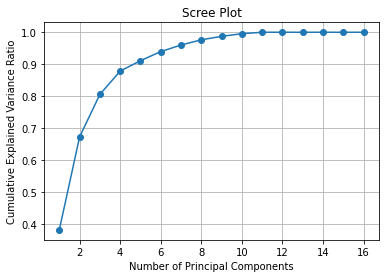

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


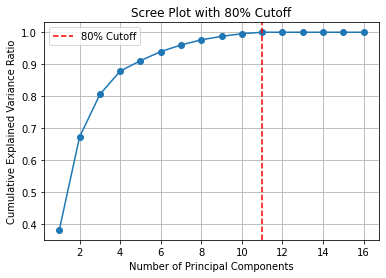

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 100% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 1) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


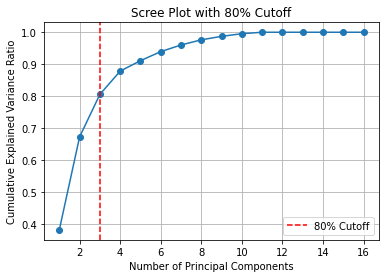

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


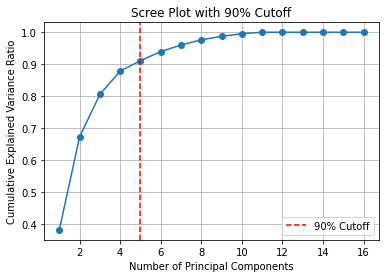

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


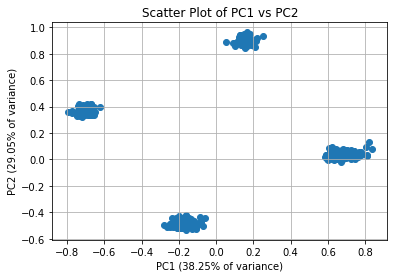

In [95]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_imputed)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


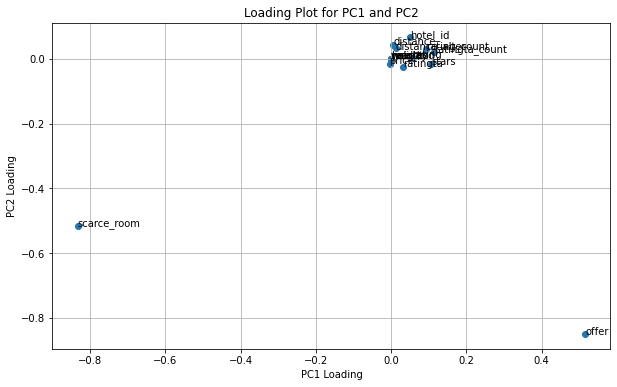

In [96]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_imputed)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(df_scaled_imputed.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()


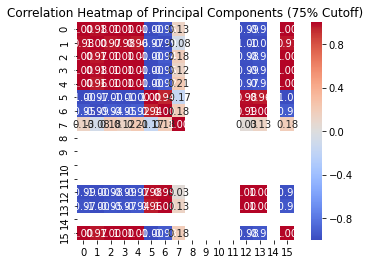

In [97]:
import seaborn as sns
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_imputed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Get the principal components up to the cutoff index
principal_components_cutoff = pca.components_[:cutoff_index]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(principal_components_cutoff.T)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Principal Components (75% Cutoff)')
plt.show()


# PCA with dropped data

In [98]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_dropped)

# Create a new DataFrame with the scaled data
df_scaled_dropped = pd.DataFrame(scaled_data, columns=df_num_dropped.columns)

# Print the scaled data
print(df_scaled_dropped)


     rating_count     price  stars  ratingta  ratingta_count  scarce_room  \
0        0.022727  0.054822  0.750  0.833333        0.067529          1.0   
1        0.122078  0.054822  0.750  0.500000        0.222783          0.0   
2        0.033766  0.058883  0.750  0.500000        0.197854          0.0   
3        0.035065  0.056853  0.500  0.666667        0.015778          0.0   
4        0.020779  0.055838  0.750  0.500000        0.068476          1.0   
..            ...       ...    ...       ...             ...          ...   
423      0.000649  0.083249  0.500  0.333333        0.003787          1.0   
424      0.093506  0.160406  1.000  0.666667        0.232881          0.0   
425      0.072078  0.074112  0.750  0.833333        0.316819          1.0   
426      0.109091  0.031472  0.500  0.333333        0.041969          0.0   
427      0.051299  0.084264  0.625  0.663590        0.174982          1.0   

     hotel_id  offer  distance  distance_alter  rating  
0    0.000000    1

In [99]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components:
[[ 9.40296195e-02 -4.10231580e-03  1.06875517e-01  3.10525614e-02
   1.14136704e-01 -8.32841142e-01  4.99440474e-02  5.15872406e-01
   6.06800341e-03  1.30377672e-02  5.72525809e-02]
 [ 3.06210433e-02 -1.53658607e-02 -1.56602875e-02 -2.37427061e-02
   2.22045252e-02 -5.17632813e-01  6.62837885e-02 -8.49820452e-01
   4.38270224e-02  3.24899935e-02  3.97011993e-03]
 [-9.73147131e-02 -9.22275810e-02 -2.24602039e-01 -1.38222548e-01
  -1.15408983e-01  3.58877582e-02  8.77027025e-01  7.06699443e-02
   2.22628450e-01  2.58737781e-01 -8.47696674e-02]
 [-1.58800271e-01 -1.53911849e-01 -5.87229775e-01 -3.87663906e-01
  -3.77861263e-01 -1.55534782e-01 -3.67663881e-01  7.96482070e-02
   9.12871208e-02  4.62633039e-02 -3.70144707e-01]
 [-6.32450074e-02  6.51381198e-02  6.54440578e-01 -2.41085752e-01
  -3.97955453e-01  7.18472218e-03 -1.50378336e-01 -9.18061751e-05
   3.87784151e-01  4.07981690e-01 -8.65035396e-02]
 [ 3.56634291e-01 -5.15085361e-02 -1.69273567e-01 -1.20707832e-

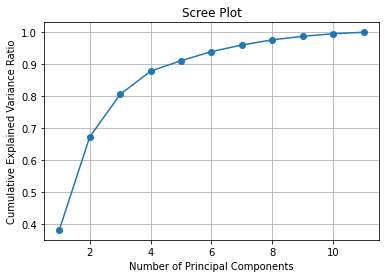

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


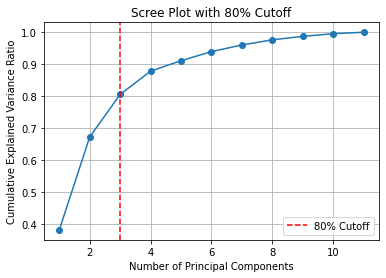

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


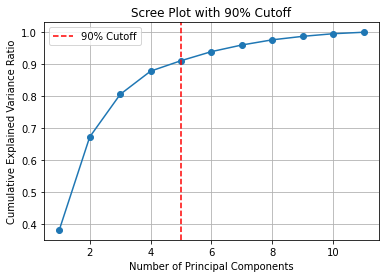

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


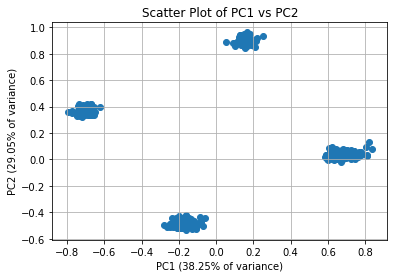

In [103]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_dropped)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


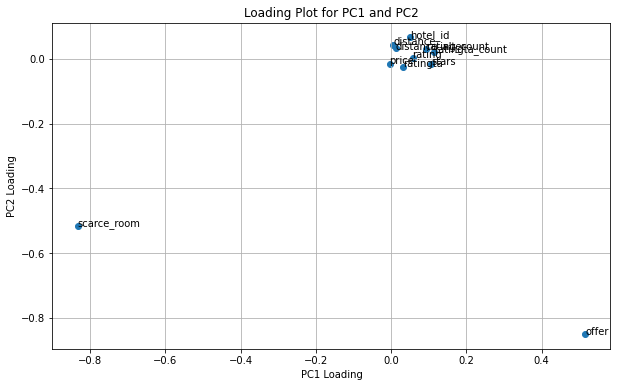

In [104]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_dropped)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(df_scaled_dropped.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()


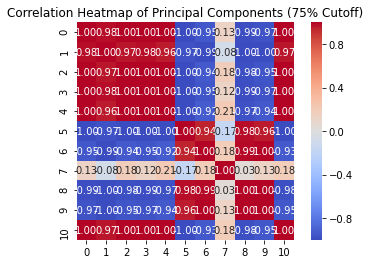

In [105]:
import seaborn as sns
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Get the principal components up to the cutoff index
principal_components_cutoff = pca.components_[:cutoff_index]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(principal_components_cutoff.T)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Principal Components (75% Cutoff)')
plt.show()


# If I did more EDA

Outliers in numerical variables

In [42]:
df_num_dropped

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,distance,distance_alter,rating
0,36.0,81,4.0,4.500000,216.000000,1,21894,1,2.7,4.4,4.4
1,189.0,81,4.0,3.500000,708.000000,0,21897,1,1.7,3.8,3.9
2,53.0,85,4.0,3.500000,629.000000,0,21901,1,1.4,2.5,3.7
3,55.0,83,3.0,4.000000,52.000000,0,21902,1,1.7,2.5,4.0
4,33.0,82,4.0,3.500000,219.000000,1,21903,1,1.2,2.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...
423,2.0,109,3.0,3.000000,14.000000,1,22404,1,1.5,3.8,5.0
424,145.0,185,5.0,4.000000,740.000000,0,22406,1,0.8,3.6,4.3
425,112.0,100,4.0,4.500000,1006.000000,1,22407,0,1.0,3.7,4.4
426,169.0,58,3.0,3.000000,135.000000,0,22408,1,1.4,4.1,3.2


In [43]:
df_num_dropped.columns

Index(['rating_count', 'price', 'stars', 'ratingta', 'ratingta_count',
       'scarce_room', 'hotel_id', 'offer', 'distance', 'distance_alter',
       'rating'],
      dtype='object')

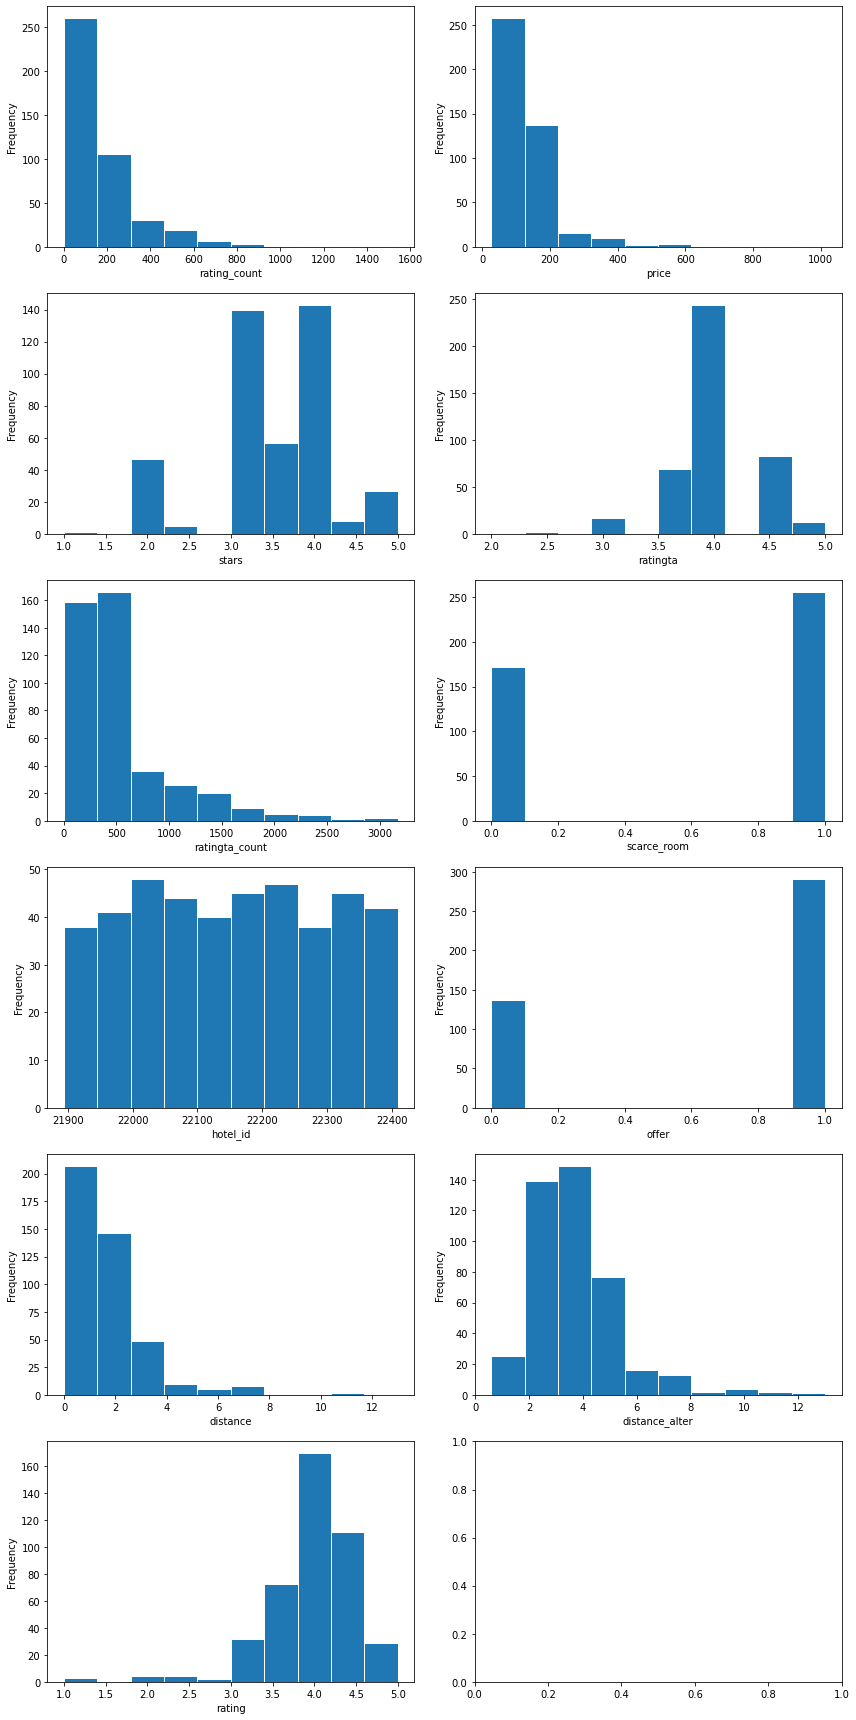

In [44]:
# Define the numerical variables
numerical_vars = ['rating_count', 'price', 'stars', 'ratingta', 'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'distance', 'distance_alter', 'rating']

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_rows = (num_plots + 1) // 2
num_cols = 2

# Create subplots for histograms
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Flatten the axs array if there is only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


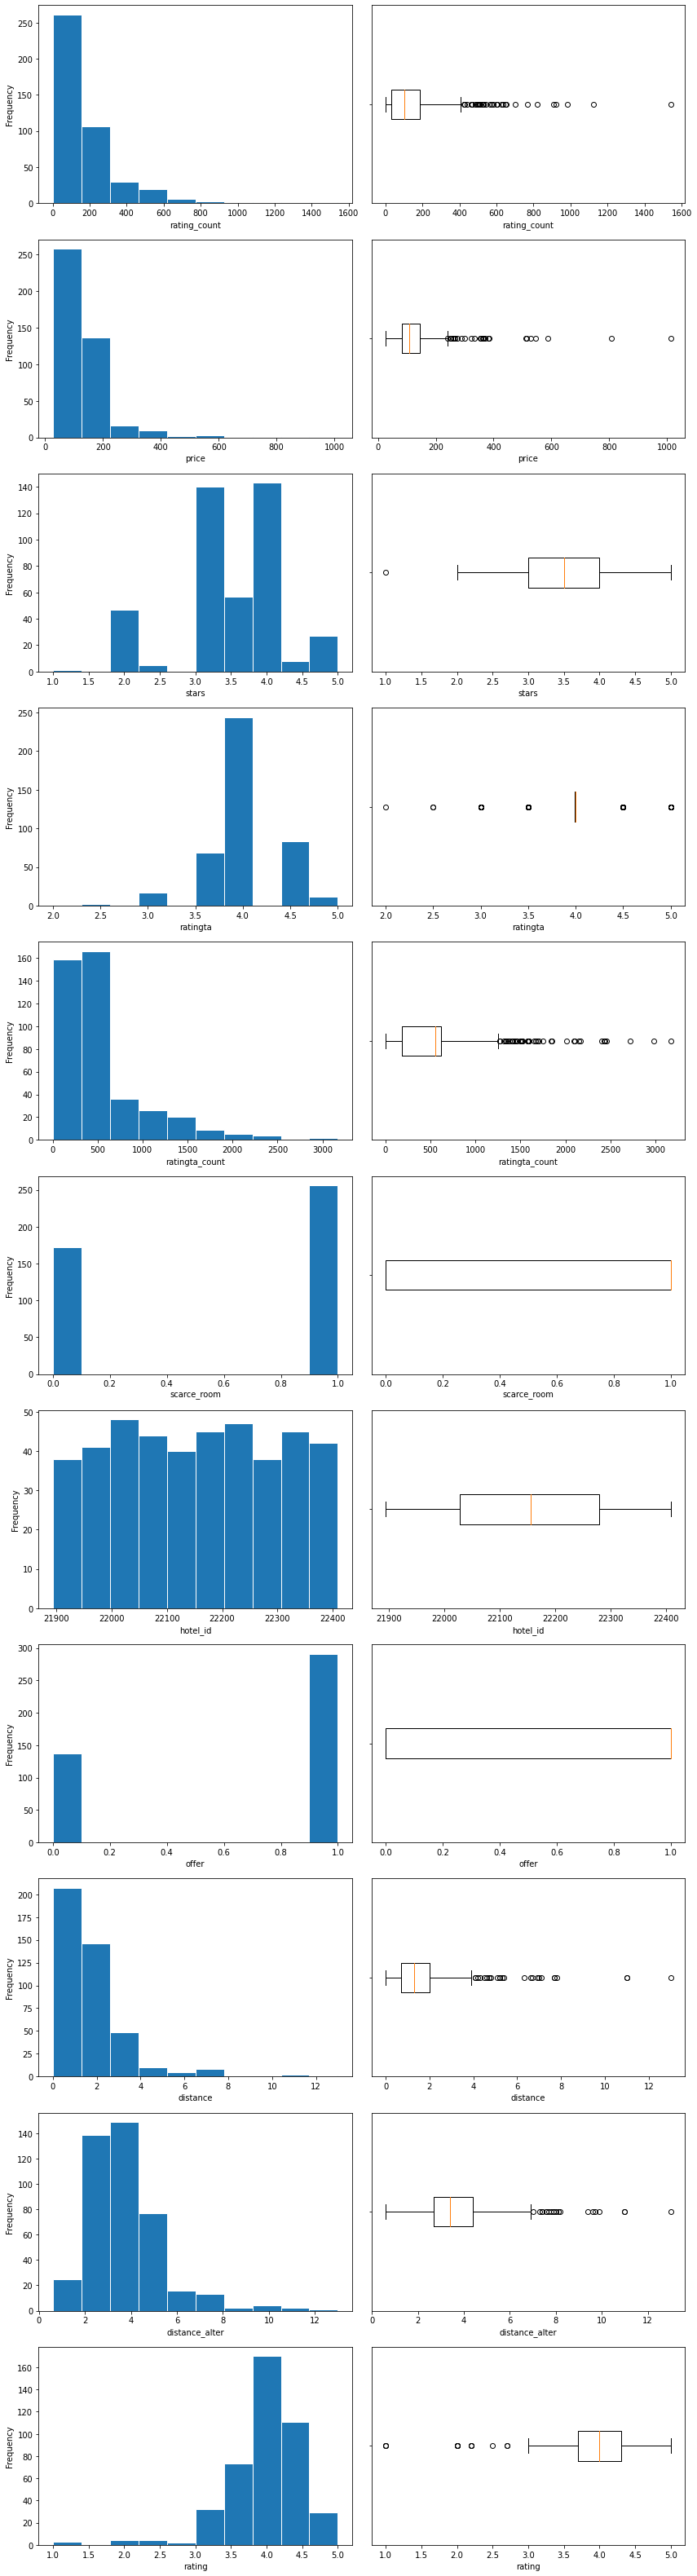

In [45]:
# Define the numerical variables

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_num_dropped[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [46]:
# To see if there is difference in distribution after droping outliers we will drop outliers remained out of the first and third quantiles
Q1 = df_num_dropped.quantile(0.25)
Q3 = df_num_dropped.quantile(0.75)
IQR = Q3 - Q1
df_num_dropped = df_num_dropped[~((df_num_dropped < (Q1 - 1.5 * IQR)) | (df_num_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

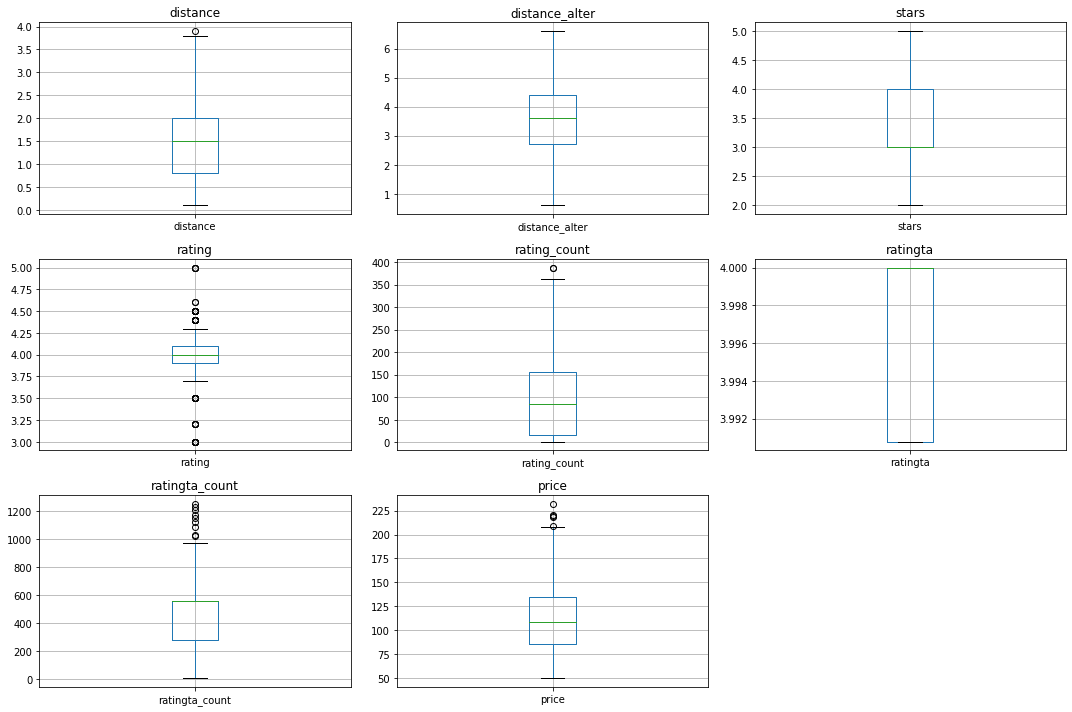

In [47]:
# Check outliers using box plots again after droping outliers
# Define the numerical variables
numerical_vars = ['distance', 'distance_alter', 'stars', 'rating', 'rating_count',
                  'ratingta', 'ratingta_count', 'price']

# Create subplots for box plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    boxplot = df_num_dropped.boxplot(column=var)
    boxplot.set_title(var)
    boxplot.set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
df_num_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 3 to 427
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_count    189 non-null    float64
 1   price           189 non-null    int64  
 2   stars           189 non-null    float64
 3   ratingta        189 non-null    float64
 4   ratingta_count  189 non-null    float64
 5   scarce_room     189 non-null    int64  
 6   hotel_id        189 non-null    int64  
 7   offer           189 non-null    int64  
 8   distance        189 non-null    float64
 9   distance_alter  189 non-null    float64
 10  rating          189 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 17.7 KB


In [49]:
df_num_dropped

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,distance,distance_alter,rating
3,55.000000,83,3.0,4.000000,52.000000,0,21902,1,1.7,2.5,4.000000
9,155.048346,153,3.0,3.990769,556.516923,1,21910,1,1.5,2.7,3.970992
10,203.000000,60,4.0,4.000000,359.000000,1,21912,1,1.1,2.7,4.100000
11,251.000000,128,4.0,4.000000,829.000000,0,21913,0,0.8,2.9,4.000000
12,142.000000,100,4.0,4.000000,55.000000,1,21914,1,1.0,2.3,4.500000
...,...,...,...,...,...,...,...,...,...,...,...
418,112.000000,110,3.0,4.000000,263.000000,0,22399,0,0.8,3.6,3.900000
419,1.000000,84,3.5,3.990769,556.516923,1,22400,0,0.9,3.6,5.000000
420,77.000000,100,3.0,4.000000,149.000000,1,22401,1,1.2,3.7,4.000000
424,145.000000,185,5.0,4.000000,740.000000,0,22406,1,0.8,3.6,4.300000


In [50]:
# To drop index and create new one
df_num_dropped = df_num_dropped.reset_index(drop=True)
df_num_dropped

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,distance,distance_alter,rating
0,55.000000,83,3.0,4.000000,52.000000,0,21902,1,1.7,2.5,4.000000
1,155.048346,153,3.0,3.990769,556.516923,1,21910,1,1.5,2.7,3.970992
2,203.000000,60,4.0,4.000000,359.000000,1,21912,1,1.1,2.7,4.100000
3,251.000000,128,4.0,4.000000,829.000000,0,21913,0,0.8,2.9,4.000000
4,142.000000,100,4.0,4.000000,55.000000,1,21914,1,1.0,2.3,4.500000
...,...,...,...,...,...,...,...,...,...,...,...
184,112.000000,110,3.0,4.000000,263.000000,0,22399,0,0.8,3.6,3.900000
185,1.000000,84,3.5,3.990769,556.516923,1,22400,0,0.9,3.6,5.000000
186,77.000000,100,3.0,4.000000,149.000000,1,22401,1,1.2,3.7,4.000000
187,145.000000,185,5.0,4.000000,740.000000,0,22406,1,0.8,3.6,4.300000


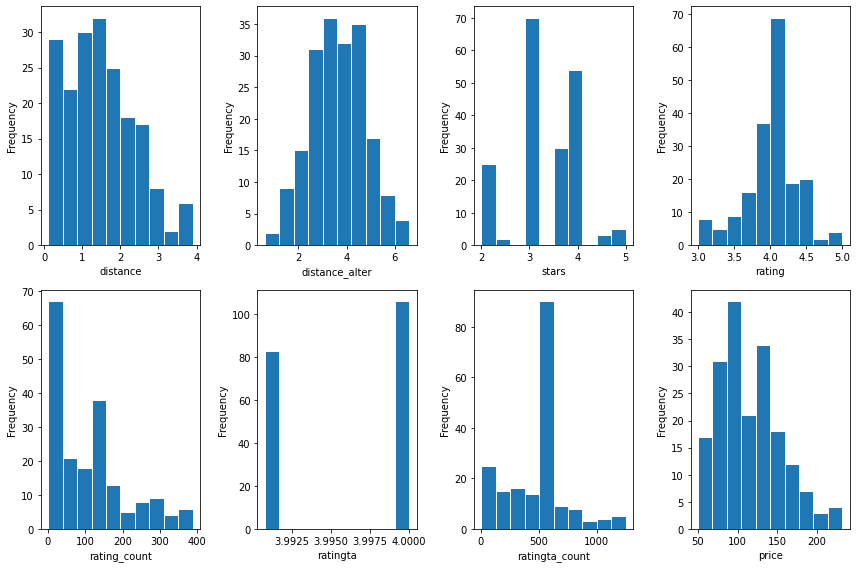

In [51]:
# Create subplots for histograms
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
axs = axs.flatten()

# Plot histograms for each variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(df_num_dropped[var], bins=10, edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_dropped)

# Create a new DataFrame with the scaled data
df_scaled_dropped = pd.DataFrame(scaled_data, columns=df_num_dropped.columns)

# Print the scaled data
print(df_scaled_dropped)


     rating_count     price     stars  ratingta  ratingta_count  scarce_room  \
0        0.139535  0.181319  0.333333       1.0        0.037781          0.0   
1        0.398058  0.565934  0.333333       0.0        0.443342          1.0   
2        0.521964  0.054945  0.666667       1.0        0.284566          1.0   
3        0.645995  0.428571  0.666667       1.0        0.662379          0.0   
4        0.364341  0.274725  0.666667       1.0        0.040193          1.0   
..            ...       ...       ...       ...             ...          ...   
184      0.286822  0.329670  0.333333       1.0        0.207395          0.0   
185      0.000000  0.186813  0.500000       0.0        0.443342          1.0   
186      0.196382  0.274725  0.333333       1.0        0.115756          1.0   
187      0.372093  0.741758  1.000000       1.0        0.590836          0.0   
188      0.204134  0.329670  0.500000       0.0        0.443342          1.0   

     hotel_id  offer  distance  distanc

In [53]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components:
[[ 2.32183748e-01 -1.10035089e-01  1.30710249e-01  7.09686918e-01
  -3.76075928e-02 -5.91383927e-01  3.91410411e-02  2.38096354e-01
   6.54211605e-04 -2.74361829e-02  5.58385925e-02]
 [ 2.01303117e-01  7.64619033e-02  1.05501096e-01  3.03953160e-02
   1.05484988e-01 -2.39068159e-01 -5.95076015e-02 -9.07133483e-01
  -1.64636322e-01 -1.20897893e-01  7.17068884e-02]
 [-1.89006618e-01 -8.42567199e-02 -2.07102257e-01 -3.78460407e-01
   1.06675983e-01 -5.82979969e-01  3.95882824e-01 -6.40679689e-02
   4.18921075e-01  2.83091502e-01 -5.78332791e-02]
 [-2.41854218e-01 -2.32602187e-01 -1.74433489e-01  4.64985106e-01
  -3.26447315e-01  3.88401574e-01  4.73855412e-01 -3.07200159e-01
   2.00865157e-01  1.54928625e-01 -8.96422783e-03]
 [-2.62536351e-01 -2.14948517e-01 -4.81977875e-01  5.36087187e-02
  -3.34070219e-01 -1.93423651e-01 -5.90839054e-01 -9.97956530e-02
   1.94118736e-02 -9.21330101e-02 -3.64368413e-01]
 [ 5.73661214e-01 -1.79910612e-01 -3.03162685e-01  1.11931216e-

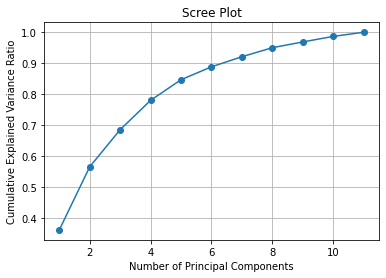

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


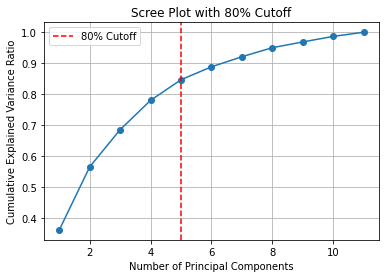

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 80% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.80) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='80% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 80% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


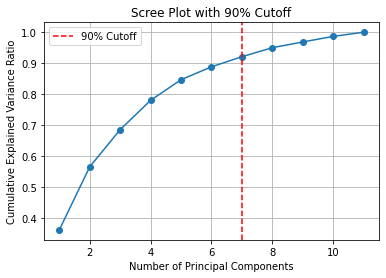

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


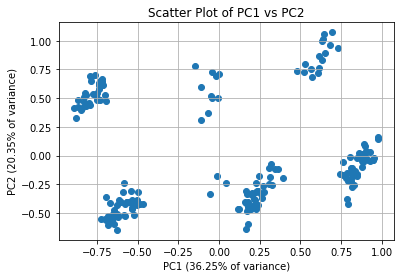

In [57]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_dropped)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


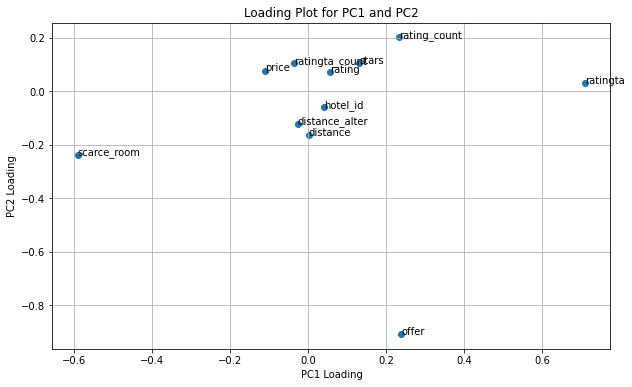

In [58]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_dropped)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(df_scaled_dropped.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()


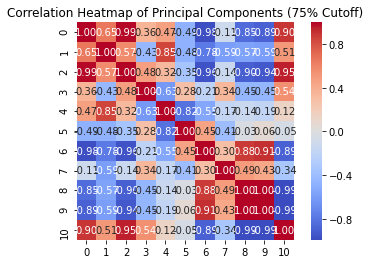

In [59]:
import seaborn as sns
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled_dropped)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Get the principal components up to the cutoff index
principal_components_cutoff = pca.components_[:cutoff_index]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(principal_components_cutoff.T)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Principal Components (75% Cutoff)')
plt.show()
